<a href="https://colab.research.google.com/github/rodriguezmorenoc579-source/LABORATORIO-17/blob/main/ainductivo17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLASIFICADOR RANDOM FOREST DE EVALUACIÓN DE VEHICULOS

Random Forest es un algoritmo de aprendizaje automático supervisado que se basa en el aprendizaje conjunto. En este núcleo, construyo dos modelos de clasificador de bosque aleatorio para predecir la seguridad del automóvil, uno con 10 árboles de decisión y otro con 100 árboles de decisión. La precisión esperada aumenta con el número de árboles de decisión en el modelo. He demostrado el proceso de selección de funciones utilizando el modelo Random Forest para encontrar solo las funciones importantes, reconstruir el modelo utilizando estas funciones y ver su efecto en la precisión.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Cargar el archivo CSV usando pandas
df = pd.read_csv('car_evaluation.csv')

# Mostrar las primeras filas del dataset para verificar
print(df.head())

# Descripción del conjunto de datos
print(df.describe())

   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc
       vhigh vhigh.1     2   2.1 small   low  unacc
count   1727    1727  1727  1727  1727  1727   1727
unique     4       4     4     3     3     3      4
top     high    high     3     4   med   med  unacc
freq     432     432   432   576   576   576   1209


Ahora, exploramos los datos para obtener información sobre ellos.

In [3]:
# view dimensions of dataset

df.shape

(1727, 7)

Podemos ver que hay 1728 instancias y 7 variables en el conjunto de datos.

Top 5 del dataset

In [4]:
# preview the dataset

df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Cambiar el nombre de las columnas
Podemos ver que el conjunto de datos no tiene nombres de columna adecuados. Las columnas están simplemente etiquetadas como 0,1,2... y así sucesivamente. Deberíamos dar nombres propios a las columnas. Lo hacemos asi:

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Podemos ver que se cambia el nombre de los nombres de las columnas. Ahora las columnas tienen nombres significativos.

Ver resumen del conjunto de datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Distribución de frecuencia de valores en variables.
Ahora comprobamos los recuentos de frecuencia de las variables categóricas.

In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:

    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


Podemos ver que las puertas y las personas son de naturaleza categórica. Por tanto, las tratamos como variables categóricas.

Resumen de variables
Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
Estos vienen dados por compra, mantenimiento, puertas, personas, maletero, seguridad y clase.
la clase es la variable objetivo.

Exploramos la variable Clase

In [9]:
df['class'].value_counts()

,count
class,
unacc,1209
acc,384
good,69
vgood,65


La variable objetivo de clase es de naturaleza ordinal.

Valores faltantes en variables

In [10]:
# check missing values in variables

df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


Podemos ver que no faltan valores en el conjunto de datos. Hemos comprobado la distribución de frecuencia de los valores anteriormente. También confirma que no faltan valores en el conjunto de datos.

Declarar vector de características y variable de destino

In [11]:
X = df.drop(['class'], axis=1)

y = df['class']

Dividir los datos en conjuntos de prueba y entrenamiento separados

In [12]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (570, 6))

La ingeniería de funciones es el proceso de transformar datos sin procesar en funciones útiles que nos ayudan a comprender mejor nuestro modelo y aumentar su poder predictivo. Ejecutamos ingeniería de características sobre diferentes tipos de variables.

Primero, revisamos nuevamente los tipos de datos de las variables.

In [14]:
# check data types in X_train

X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


Codificar variables categóricas

In [15]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


Podemos ver que todas las variables son del tipo de datos categóricos ordinales.

In [16]:
# import category encoders
!pip install category_encoders
import category_encoders as ce

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [17]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [18]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [19]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


Modelo de clasificador de bosque aleatorio con parámetros predeterminados

In [20]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9649


Aquí, y_test son las etiquetas de clase verdaderas y y_pred son las etiquetas de clase previstas en el conjunto de pruebas.

Aquí, se construye el modelo Clasificador de bosque aleatorio con el parámetro predeterminado de n_estimators = 10. Entonces, usamos 10 árboles de decisión para construir el modelo. Ahora, aumentamos la cantidad de árboles de decisión y vemos su efecto en la precisión.

Modelo de clasificador de bosque aleatorio con parámetro n_estimators=100

In [21]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9649


Encuentre características importantes con el modelo Random Forest

Hasta ahora, hemos utilizado todas las funciones proporcionadas en el modelo. Ahora, seleccionamos solo las características importantes, construimos el modelo usando estas características y vemos su efecto en la precisión.

Primero, creamos el modelo de bosque aleatorio de la siguiente manera:

In [22]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Ahora, usamos la variable de importancia de las características para ver las puntuaciones de importancia de las características.

In [23]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
safety,0.291657
persons,0.235380
buying,0.160692
maint,0.134143
lug_boot,0.111595
doors,0.066533


Podemos ver que la característica más importante es la seguridad y la menos importante son las puertas.

Visualizar puntuaciones de características de las características.

Ahora, visualizamos las puntuaciones de las funciones con matplotlib y seaborn.

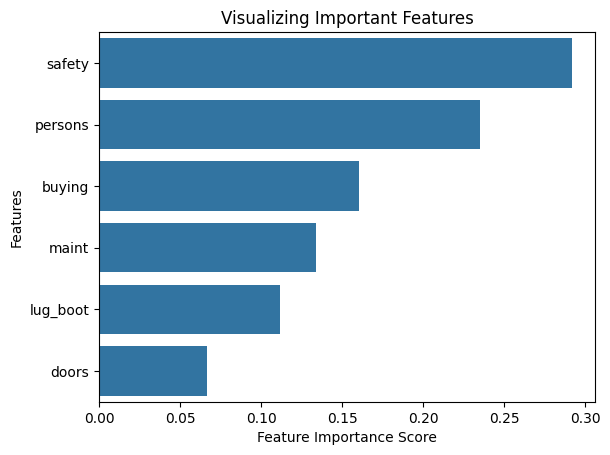

In [24]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

Construya un modelo de bosque aleatorio en características seleccionadas

Ahora, eliminamos las puertas de características menos importantes del modelo, reconstruimos el modelo y verificamos su efecto en la precisión.

In [25]:
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [26]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Ahora, construimos el modelo de bosque aleatorio y verificamos la precisión.

In [27]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [28]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9263


Quitamos la variable de puertas del modelo, la reconstruimos y verificamos su precisión. La precisión del modelo sin puertas variables es 0,9264. La precisión del modelo con todas las variables tomadas en cuenta es 0,9247. Entonces, podemos ver que la precisión del modelo se ha mejorado al eliminar la variable de puertas del modelo.

Además, el segundo modelo menos importante es lug_boot. Si lo eliminamos del modelo y lo reconstruimos, la precisión es de 0,8546. Es una caída significativa en la precisión. Por lo tanto, no lo eliminamos del modelo.

Ahora, según el análisis anterior, podemos concluir que la precisión de nuestro modelo de clasificación es muy buena. Nuestro modelo está haciendo un muy buen trabajo en términos de predecir las etiquetas de clase.

Pero no proporciona la distribución subyacente de valores. Además, no dice nada sobre el tipo de errores que comete nuestro clasificador.

Tenemos otra herramienta llamada Matriz de confusión que viene a nuestro rescate.

Matrix de Confusión

Una matriz de confusión es una herramienta para resumir el desempeño de un algoritmo de clasificación. Una matriz de confusión nos dará una imagen clara del rendimiento del modelo de clasificación y los tipos de errores producidos por el modelo. Nos da un resumen de predicciones correctas e incorrectas desglosadas por cada categoría. El resumen se presenta en forma de tabla.

Son posibles cuatro tipos de resultados al evaluar el desempeño de un modelo de clasificación. Estos cuatro resultados se describen a continuación: -

Verdaderos positivos (TP): los verdaderos positivos ocurren cuando predecimos que una observación pertenece a una determinada clase y la observación en realidad pertenece a esa clase.

Verdaderos Negativos (TN): Los Verdaderos Negativos ocurren cuando predecimos que una observación no pertenece a una determinada clase y la observación en realidad no pertenece a esa clase.

Falsos positivos (FP): los falsos positivos ocurren cuando predecimos que una observación pertenece a una determinada clase, pero la observación en realidad no pertenece a esa clase. Este tipo de error se denomina error de tipo I.

Falsos negativos (FN): los falsos negativos ocurren cuando predecimos que una observación no pertenece a una determinada clase, pero la observación en realidad pertenece a esa clase. Este es un error muy grave y se llama error de tipo II.

Estos cuatro resultados se resumen en una matriz de confusión que se proporciona a continuación.

In [29]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[108   5  12   2]
 [  1  10   2   5]
 [ 10   0 389   0]
 [  4   1   0  21]]


REPORTE DE CLASIFICACIÓN

El informe de clasificación es otra forma de evaluar el rendimiento del modelo de clasificación. Muestra las puntuaciones de precisión, recuperación, f1 y soporte del modelo.

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.88      0.85      0.86       127
        good       0.62      0.56      0.59        18
       unacc       0.97      0.97      0.97       399
       vgood       0.75      0.81      0.78        26

    accuracy                           0.93       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.93      0.93      0.93       570



- En este proyecto, construimos un clasificador de bosque aleatorio para predecir la seguridad del automóvil. Construimos dos modelos, uno con 10 árboles de decisión y otro con 100 árboles de decisión.
-La puntuación de precisión del modelo con 10 árboles de decisión es 0,9247, pero lo mismo con 100 árboles de decisión es 0,9457. Entonces, la precisión esperada aumenta con el número de árboles de decisión en el modelo.
-Utilizamos el modelo Random Forest para encontrar solo las características importantes, construir el modelo usando estas características y ver su efecto en la precisión. La característica más importante es la seguridad y la menos importante son las puertas.
-Quitamos la variable de puertas del modelo, la reconstruimos y verificamos su precisión. La precisión del modelo sin puertas variables es 0,9264. La precisión del modelo con todas las variables tomadas en cuenta es 0,9247. -Entonces, podemos ver que la precisión del modelo se ha mejorado al eliminar la variable de puertas del modelo.
-El segundo modelo menos importante es lug_boot. Si lo eliminamos del modelo y lo reconstruimos, la precisión es de 0,8546. Es una caída significativa en la precisión. Por lo tanto, no lo eliminaremos del modelo.
-La matriz de confusión y el informe de clasificación son otra herramienta para visualizar el rendimiento del modelo. Dan buen rendimiento.